Import Necessary Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [3]:
Data =  pd.read_csv("/content/survey_results_public.csv")

Initial Exploration

In [4]:
Data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10549 entries, 0 to 10548
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           10549 non-null  int64  
 1   Q120                                 10549 non-null  object 
 2   MainBranch                           10549 non-null  object 
 3   Age                                  10549 non-null  object 
 4   Employment                           10434 non-null  object 
 5   RemoteWork                           8728 non-null   object 
 6   CodingActivities                     8724 non-null   object 
 7   EdLevel                              10444 non-null  object 
 8   LearnCode                            10404 non-null  object 
 9   LearnCodeOnline                      8357 non-null   object 
 10  LearnCodeCoursesCert                 4076 non-null   object 
 11  YearsCode                   

In [6]:
Data.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,10549.000000,5.696000e+03,5515.000000,5.670000e+03
mean,5275.000000,1.880961e+07,10.790209,1.005906e+05
std,3045.378329,3.344336e+08,8.704789,1.572350e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,2638.000000,7.000000e+04,4.000000,4.445350e+04
50%,5275.000000,1.270000e+05,8.000000,7.794400e+04
75%,7912.000000,2.500000e+05,15.000000,1.280000e+05
max,10549.000000,1.840199e+10,50.000000,9.000000e+06


In [7]:
Data.shape

(10549, 84)

In [8]:
Data.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

Data Cleaning and Preprocessing

Handling missing values

In [9]:
Data.isnull().sum()

ResponseId                0
Q120                      0
MainBranch                0
Age                       0
Employment              115
                       ... 
ProfessionalTech       5269
Industry               5878
SurveyLength            279
SurveyEase              272
ConvertedCompYearly    4879
Length: 84, dtype: int64

In [10]:
numerical_columns = Data.select_dtypes(include=['int', 'float']).columns
Data[numerical_columns] = Data[numerical_columns].fillna(Data[numerical_columns].mean())

In [11]:
categorical_columns = Data.select_dtypes(include=['object']).columns
Data[categorical_columns] = Data[categorical_columns].fillna(Data[categorical_columns].mode().iloc[0])

In [12]:
Data.isnull().sum()

ResponseId             0
Q120                   0
MainBranch             0
Age                    0
Employment             0
                      ..
ProfessionalTech       0
Industry               0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
Length: 84, dtype: int64

RELEVENT DATA

In [19]:
Relevant_Data = [
    'ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'EdLevel',
    'YearsCode', 'YearsCodePro', 'DevType', 'Country',
    'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'OpSysPersonal use',
    'OpSysProfessional use', 'SOVisitFreq', 'AIToolCurrently Using', 'AIToolInterested in Using', 'AISent', 'AIAcc', 'AIBen'

]

In [20]:
print(Relevant_Data)

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'Country', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'SOVisitFreq', 'AIToolCurrently Using', 'AIToolInterested in Using', 'AISent', 'AIAcc', 'AIBen']


In [21]:
BackupData_df = Data[Relevant_Data].copy()
BackupData_df

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Country,...,WebframeHaveWorkedWith,WebframeWantToWorkWith,OpSysPersonal use,OpSysProfessional use,SOVisitFreq,AIToolCurrently Using,AIToolInterested in Using,AISent,AIAcc,AIBen
0,1,None of these,18-24 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,3,"Developer, full-stack",United States of America,...,React,React,Windows,Windows,Daily or almost daily,Writing code,Learning about a codebase;Project planning;Wri...,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,...,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Daily or almost daily,Writing code;Committing and reviewing code,Learning about a codebase;Writing code;Debuggi...,Indifferent,Other (please explain),Somewhat distrust
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end",United States of America,...,React,React,MacOS;Other Linux-based,MacOS;Other Linux-based,A few times per month or weekly,Writing code,Learning about a codebase;Project planning;Wri...,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",United States of America,...,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,A few times per week,Writing code,Learning about a codebase;Project planning;Wri...,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",Philippines,...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,Other (Please Specify):,Other (Please Specify):,A few times per week,Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Committing and r...,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10544,10545,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,20,"Developer, back-end",United Kingdom of Great Britain and Northern I...,...,React,React,Ubuntu,Windows,A few times per week,Writing code,Learning about a codebase;Project planning;Wri...,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
10545,10546,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11,10,"Developer, back-end",India,...,Spring Boot,Angular;jQuery;Node.js;Spring Boot,MacOS,Windows,A few times per month or weekly,Writing code,Learning about a codebase;Project planning;Wri...,Unfavorable,Increase productivity;Greater efficiency;Speed...,Somewhat distrust
10546,10547,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,15,12,"Developer, full-stack",Bangladesh,...,ASP.NET;ASP.NET CORE;jQuery,Angular;ASP.NET;ASP.NET CORE;Blazor;jQuery;React,Windows,Windows,Daily or almost daily,Writing code,Learning about a codebase;Project planning;Wri...,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
10547

In [22]:
Data_df = Data[Relevant_Data].copy()
Data_df

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Country,...,WebframeHaveWorkedWith,WebframeWantToWorkWith,OpSysPersonal use,OpSysProfessional use,SOVisitFreq,AIToolCurrently Using,AIToolInterested in Using,AISent,AIAcc,AIBen
0,1,None of these,18-24 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,3,"Developer, full-stack",United States of America,...,React,React,Windows,Windows,Daily or almost daily,Writing code,Learning about a codebase;Project planning;Wri...,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,...,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Daily or almost daily,Writing code;Committing and reviewing code,Learning about a codebase;Writing code;Debuggi...,Indifferent,Other (please explain),Somewhat distrust
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end",United States of America,...,React,React,MacOS;Other Linux-based,MacOS;Other Linux-based,A few times per month or weekly,Writing code,Learning about a codebase;Project planning;Wri...,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",United States of America,...,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,A few times per week,Writing code,Learning about a codebase;Project planning;Wri...,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",Philippines,...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,Other (Please Specify):,Other (Please Specify):,A few times per week,Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Committing and r...,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10544,10545,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,20,"Developer, back-end",United Kingdom of Great Britain and Northern I...,...,React,React,Ubuntu,Windows,A few times per week,Writing code,Learning about a codebase;Project planning;Wri...,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
10545,10546,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11,10,"Developer, back-end",India,...,Spring Boot,Angular;jQuery;Node.js;Spring Boot,MacOS,Windows,A few times per month or weekly,Writing code,Learning about a codebase;Project planning;Wri...,Unfavorable,Increase productivity;Greater efficiency;Speed...,Somewhat distrust
10546,10547,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,15,12,"Developer, full-stack",Bangladesh,...,ASP.NET;ASP.NET CORE;jQuery,Angular;ASP.NET;ASP.NET CORE;Blazor;jQuery;React,Windows,Windows,Daily or almost daily,Writing code,Learning about a codebase;Project planning;Wri...,Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust
10547

In [23]:
Data_df.shape

(10549, 26)

In [24]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10549 entries, 0 to 10548
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ResponseId                 10549 non-null  int64 
 1   MainBranch                 10549 non-null  object
 2   Age                        10549 non-null  object
 3   Employment                 10549 non-null  object
 4   RemoteWork                 10549 non-null  object
 5   EdLevel                    10549 non-null  object
 6   YearsCode                  10549 non-null  object
 7   YearsCodePro               10549 non-null  object
 8   DevType                    10549 non-null  object
 9   Country                    10549 non-null  object
 10  LanguageHaveWorkedWith     10549 non-null  object
 11  LanguageWantToWorkWith     10549 non-null  object
 12  DatabaseHaveWorkedWith     10549 non-null  object
 13  DatabaseWantToWorkWith     10549 non-null  object
 14  Platfo

In [25]:
Data_df.describe()

,ResponseId
count,10549.000000
mean,5275.000000
std,3045.378329
min,1.000000
25%,2638.000000
50%,5275.000000
75%,7912.000000
max,10549.000000


In [26]:
Data_df['Age'] = pd.to_numeric(Data_df['Age'], errors='coerce')
Data_df['YearsCode'] = pd.to_numeric(Data_df.YearsCode, errors='coerce')
Data_df['YearsCodePro'] = pd.to_numeric(Data_df.YearsCodePro, errors='coerce')


In [27]:
Data_df.describe()

,ResponseId,Age,YearsCode,YearsCodePro
count,10549.000000,0.0,10434.000000,10334.000000
mean,5275.000000,NaN,13.296243,8.585446
std,3045.378329,NaN,9.587892,8.054782
min,1.000000,NaN,1.000000,1.000000
25%,2638.000000,NaN,6.000000,3.000000
50%,5275.000000,NaN,10.000000,5.000000
75%,7912.000000,NaN,18.000000,12.000000
max,10549.000000,NaN,50.000000,50.000000


Exploratory Analysis and Visualization


## Top 10 countires

In [28]:
Data['Country'] = Data['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom and Ireland')

In [29]:
country_counts = Data['Country'].value_counts()
Sorting = country_counts.sort_values(ascending=False)
Top_10_countries = Sorting.head(10)
Top_10_countries


Country
United States of America      2568
India                          825
Germany                        776
Australia                      553
Canada                         489
United Kingdom and Ireland     455
Brazil                         242
France                         218
Poland                         208
Netherlands                    205
Name: count, dtype: int64

<ipython-input-30-a5ce6b65ade9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_10_countries.index, y=Top_10_countries, palette="viridis")


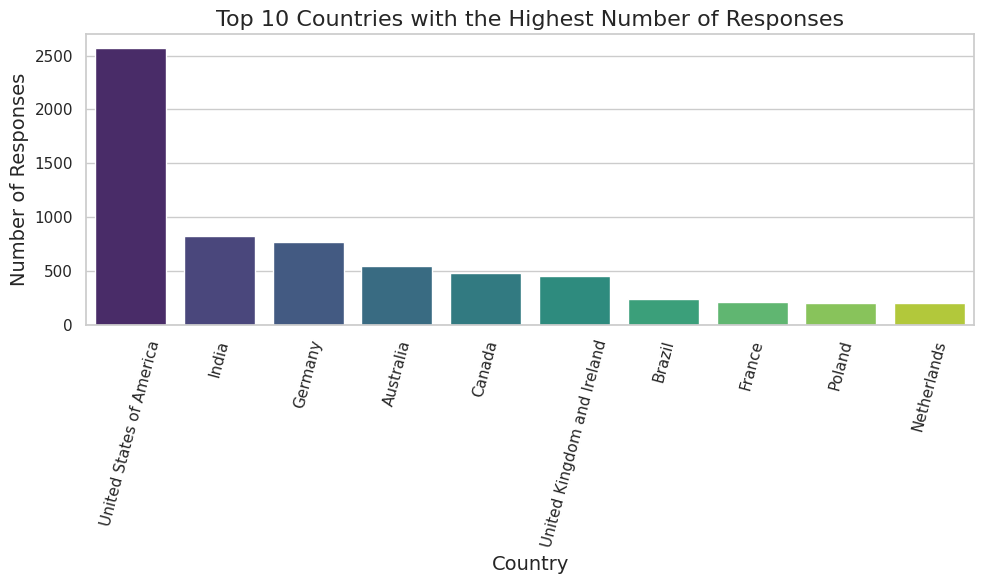

In [30]:
country_counts = Data['Country'].value_counts()
Sorting = country_counts.sort_values(ascending=False)
Top_10_countries = Sorting.head(10)
Top_10_countries

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=Top_10_countries.index, y=Top_10_countries, palette="viridis")
plt.xticks(rotation=75)
plt.title('Top 10 Countries with the Highest Number of Responses', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Responses', fontsize=14)
plt.tight_layout()
plt.show()

## The age of people who participate in the survey

In [31]:
Data_df['Age']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10544   NaN
10545   NaN
10546   NaN
10547   NaN
10548   NaN
Name: Age, Length: 10549, dtype: float64

In [32]:
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': -1,
}

In [33]:
Data['NumericalAge'] = Data['Age'].map(age_mapping)

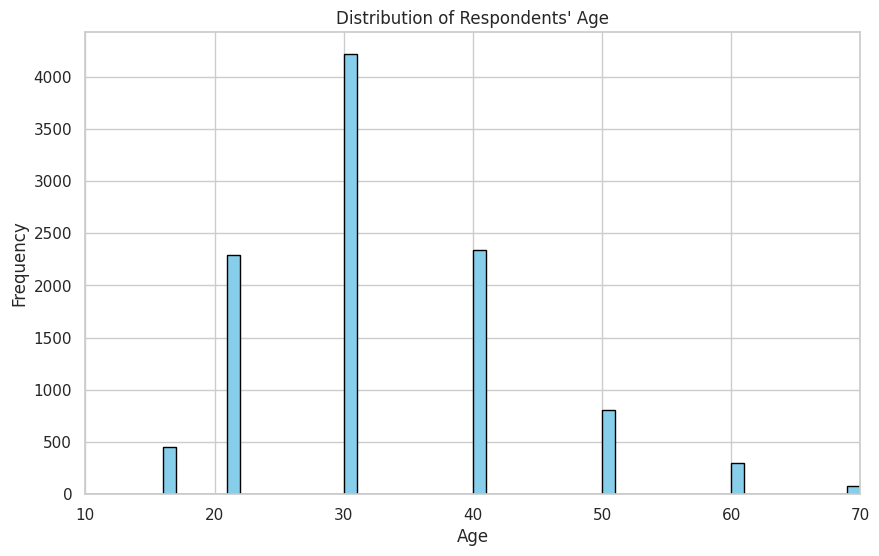

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(Data['NumericalAge'], bins=range(10, 71), color='skyblue', edgecolor='black')
plt.title('Distribution of Respondents\' Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(10, 70)  # Set the x-axis range from 10 to 70
plt.show()

## The highest level of education of people who participated in the survey


<ipython-input-35-a8fb74e467e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=Data_df['EdLevel'], palette='Set2')


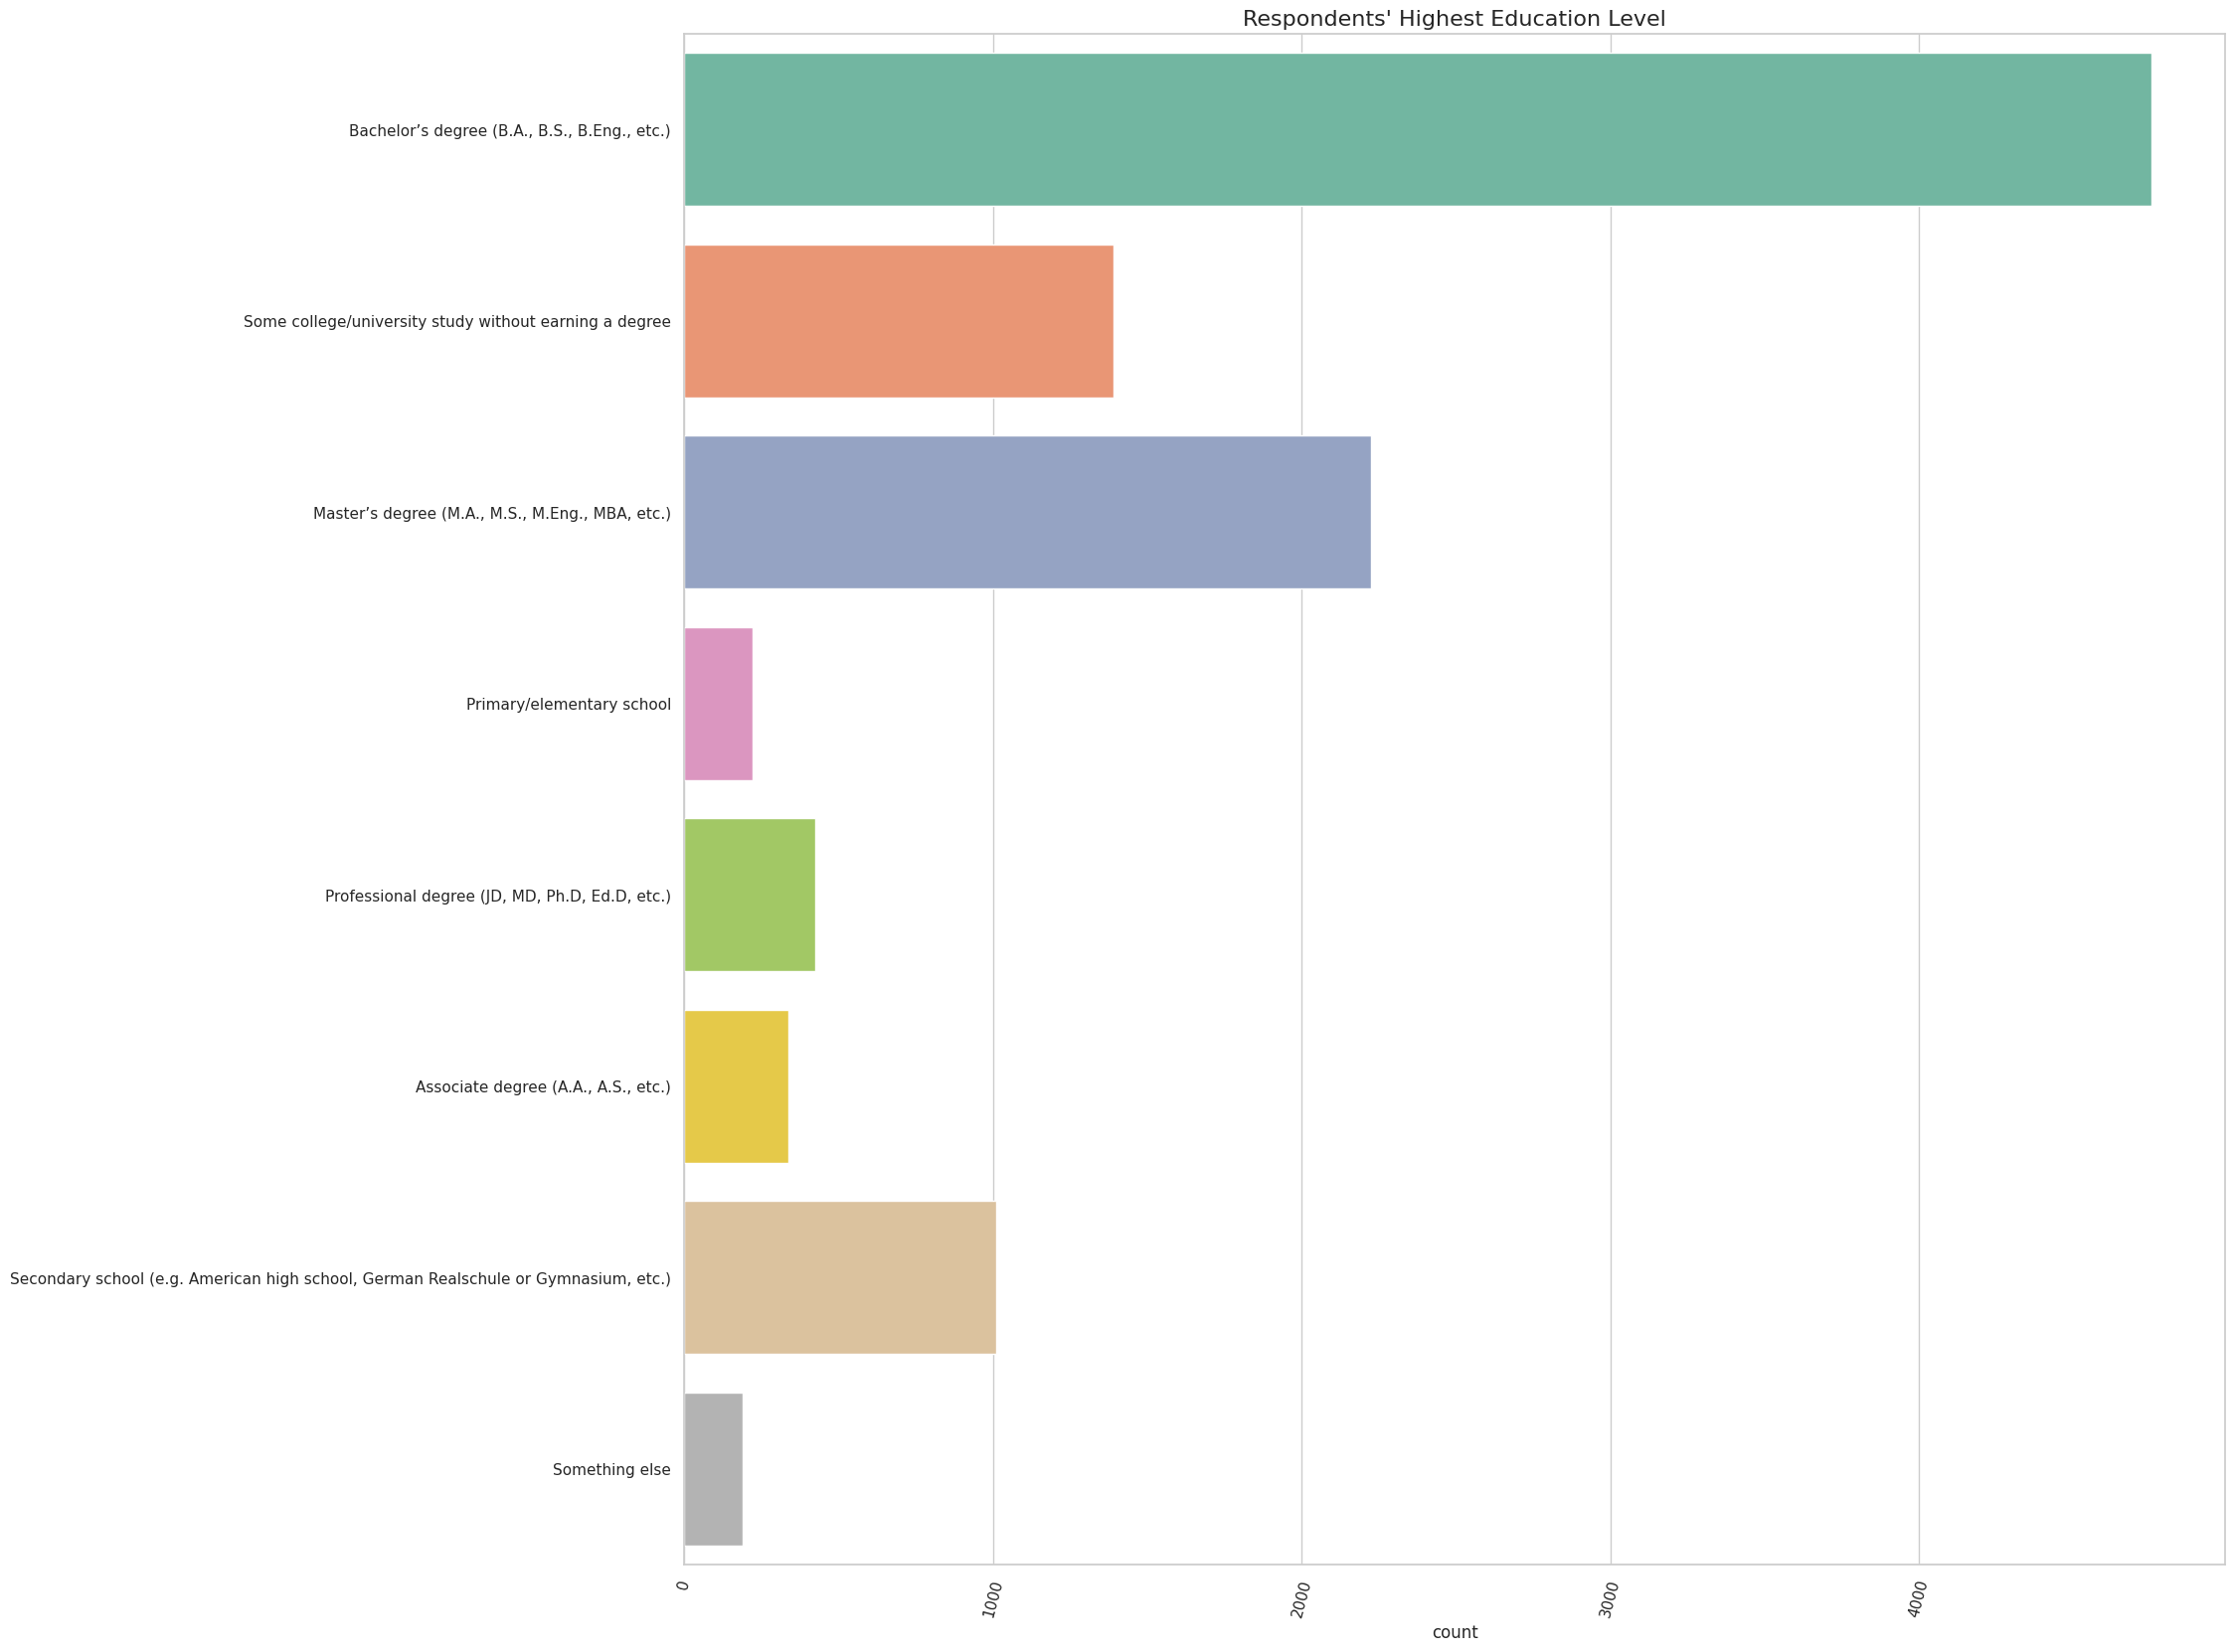

In [35]:
plt.figure(figsize=(20, 20))
sns.countplot(y=Data_df['EdLevel'], palette='Set2')
plt.xticks(rotation=75)
plt.title("Respondents' Highest Education Level", fontsize=16)
plt.ylabel(None)
plt.show()

## What are the most common programming languages that respondents have worked with?

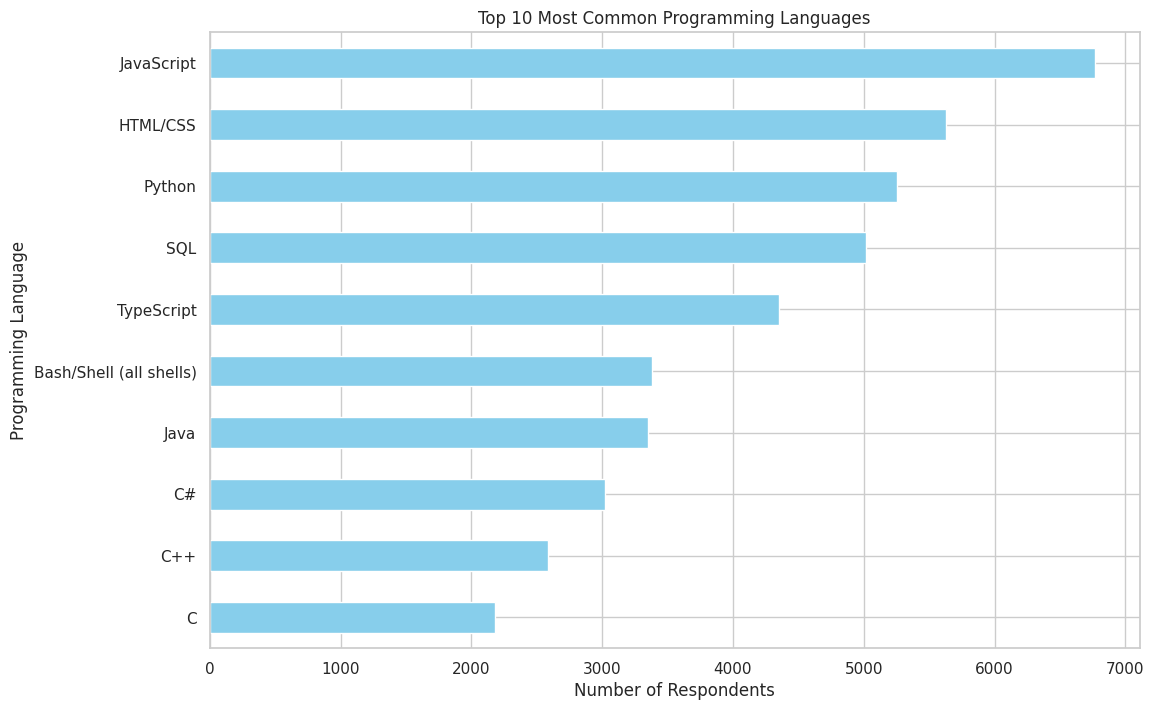

In [36]:
language_counts = Data['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()
plt.figure(figsize=(12, 8))
language_counts.head(10).sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Programming Languages')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.show()

## Which languages people are interested in learning over the next year

<ipython-input-37-2babf90589ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=desired_language_counts.head(10).index, x=desired_language_counts.head(10).values, palette='viridis')


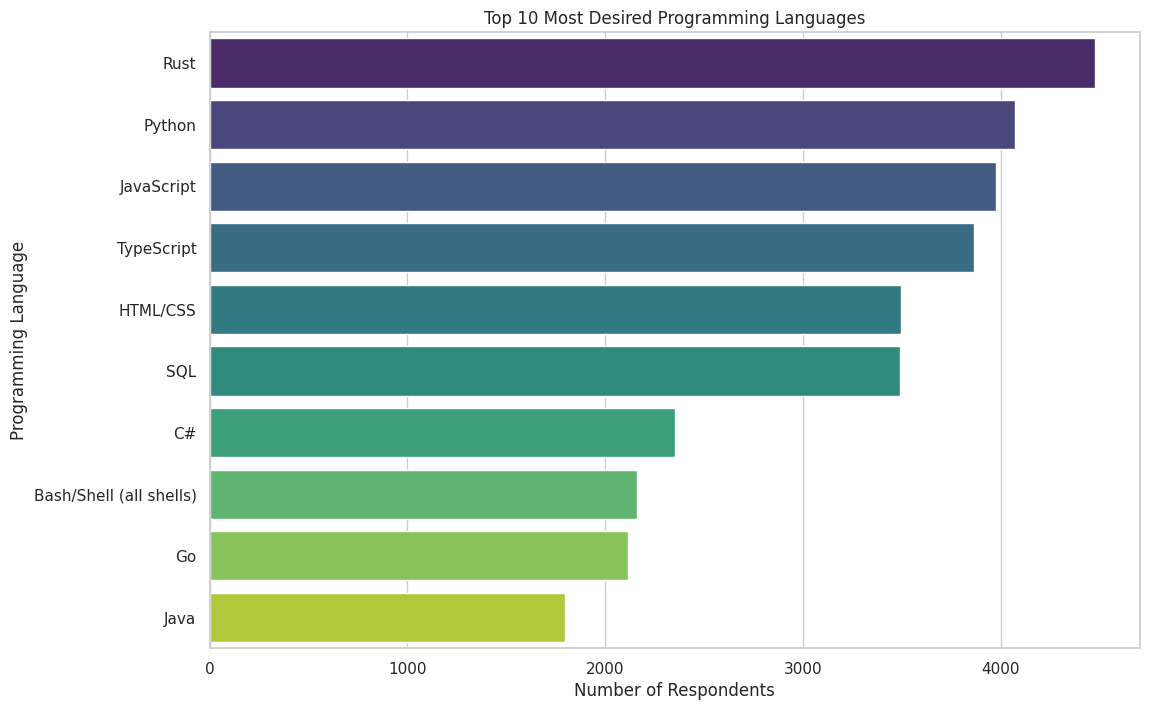

In [37]:
desired_languages = Data['LanguageWantToWorkWith'].str.split(';', expand=True).stack()
desired_language_counts = desired_languages.value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(y=desired_language_counts.head(10).index, x=desired_language_counts.head(10).values, palette='viridis')
plt.title('Top 10 Most Desired Programming Languages')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.show()

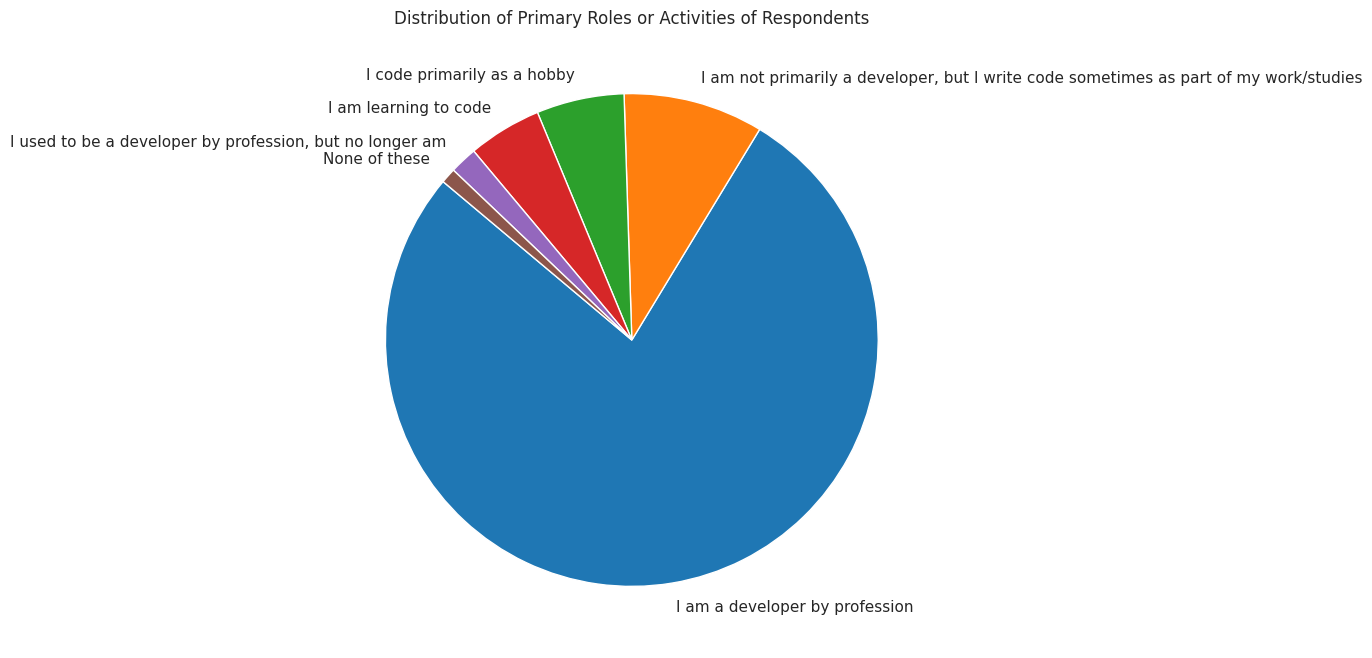

In [39]:
main_branch_counts = Data['MainBranch'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(main_branch_counts, labels=main_branch_counts.index, colors=plt.cm.tab10.colors, startangle=140)
plt.title('Distribution of Primary Roles or Activities of Respondents')
plt.show()


## What are the most common uses of  AI tools among developers?

In [40]:

# Drop NA values
cleaned_data = Data['AIToolCurrently Using'].dropna()


In [41]:
tools = cleaned_data.str.split(';').explode()

In [42]:
tool_counts = tools.value_counts()


<ipython-input-46-0b79de35949b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tool_counts.values, y=tool_counts.index, palette='Blues_d')


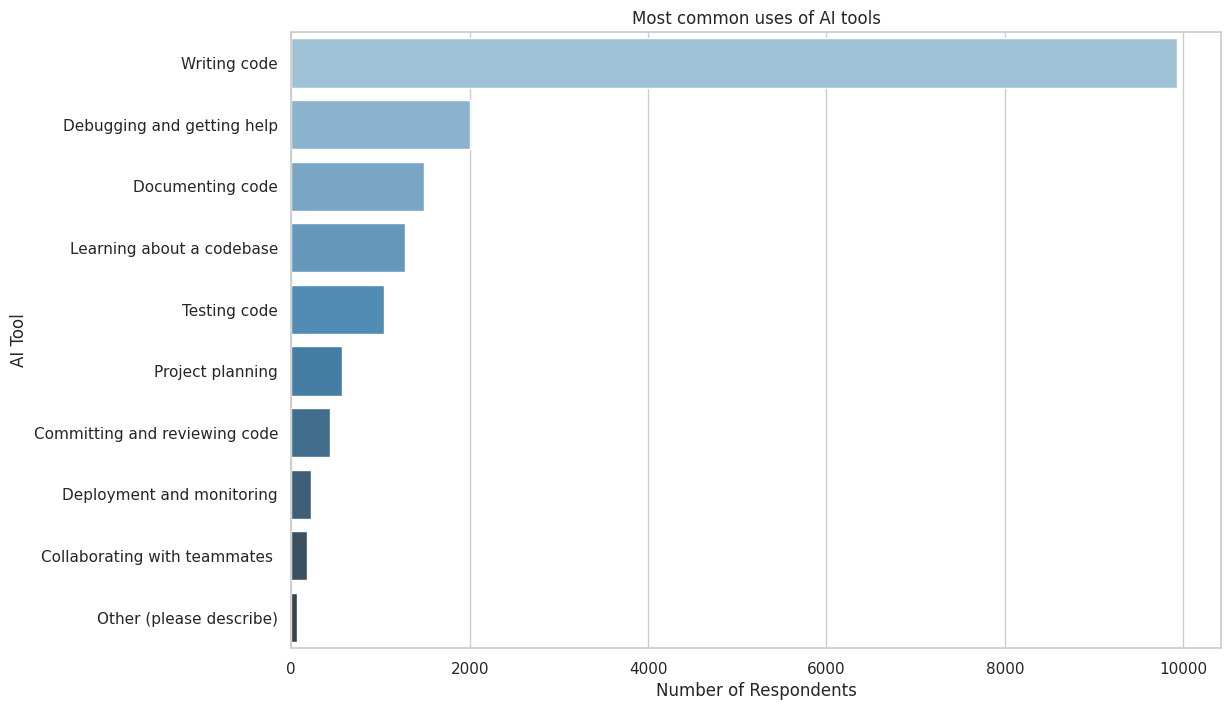

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(x=tool_counts.values, y=tool_counts.index, palette='Blues_d')
plt.title('Most common uses of AI tools')
plt.xlabel('Number of Respondents')
plt.ylabel('AI Tool')
plt.show()

## Most used Ai search tool

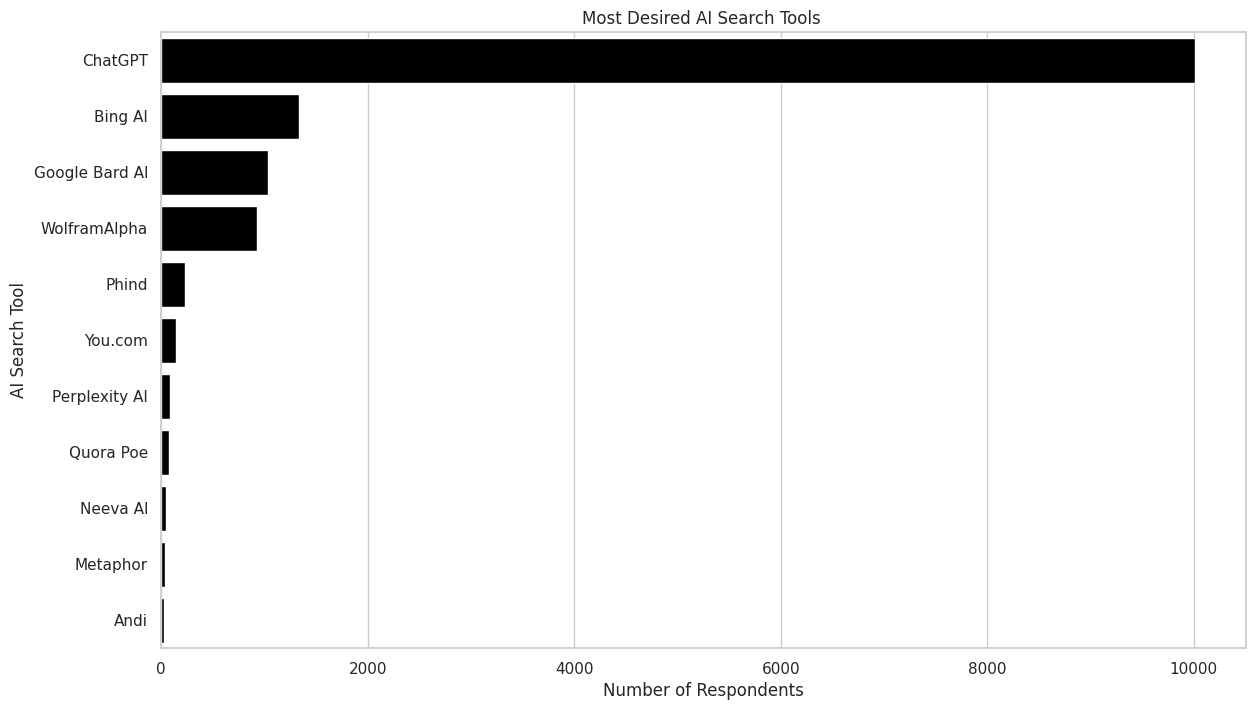

In [44]:
cleaned_ai_search_data = Data['AISearchWantToWorkWith'].dropna()

# Split the entries by ';' and flatten the list
ai_search_tools = cleaned_ai_search_data.str.split(';').explode()

# Count the occurrences of each AI search tool
ai_search_tool_counts = ai_search_tools.value_counts()

# Generate a color palette from grey to black
num_colors = len(ai_search_tool_counts)
colors = sns.color_palette("Greys", num_colors)

# Plot the most desired AI search tools
plt.figure(figsize=(14, 8))
sns.barplot(x=ai_search_tool_counts.values, y=ai_search_tool_counts.index, color='black')
plt.title('Most Desired AI Search Tools ')
plt.xlabel('Number of Respondents')
plt.ylabel('AI Search Tool')
plt.show()

## What is the overall sentiment of developers towards AI?

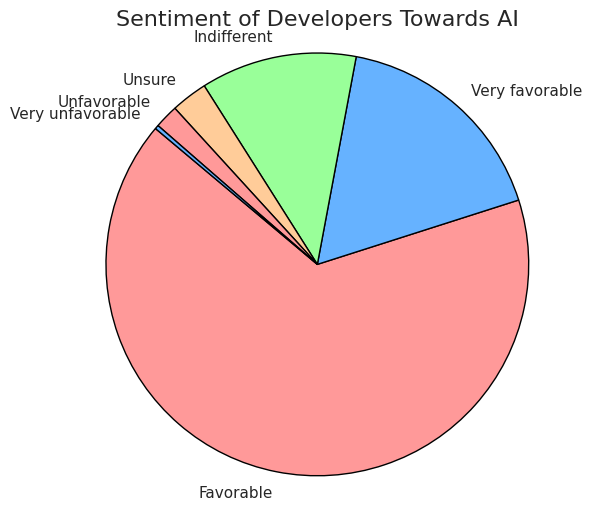

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = Data['AISent'].value_counts()
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, startangle=140, colors=custom_colors, wedgeprops={'edgecolor': 'black'})
plt.title('Sentiment of Developers Towards AI', fontsize=16)
plt.axis('equal')
plt.show()

## How much do you trust the accuracy of the output from AI tools as part of your development workflow?

<ipython-input-107-775f03ad9d5b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_counts.index, y=accuracy_counts.values, palette=custom_palette)
<ipython-input-107-775f03ad9d5b>:11: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=accuracy_counts.index, y=accuracy_counts.values, palette=custom_palette)


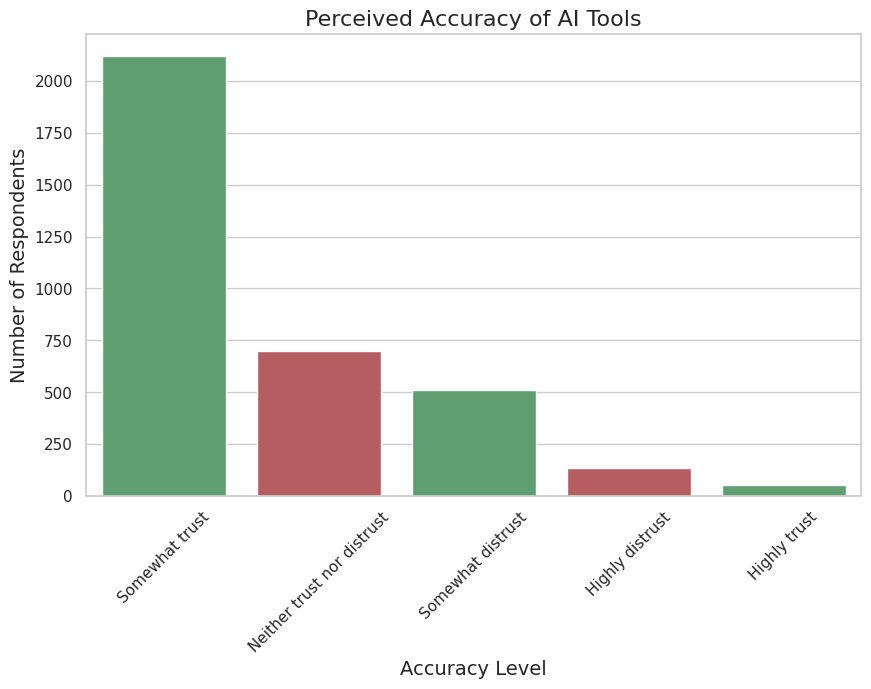

In [ ]:
cleaned_ai_ben_data = Data['AIBen'].dropna()
accuracy_counts = cleaned_ai_ben_data.value_counts()
custom_palette = ["#55a868", "#c44e52"]
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_counts.index, y=accuracy_counts.values, palette=custom_palette)
plt.title('Perceived Accuracy of AI Tools', fontsize=16)
plt.xlabel('Accuracy Level', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve

<ipython-input-106-f1e6cb327e9f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mapped_benefit_counts.index, y=mapped_benefit_counts.values, palette='pastel')


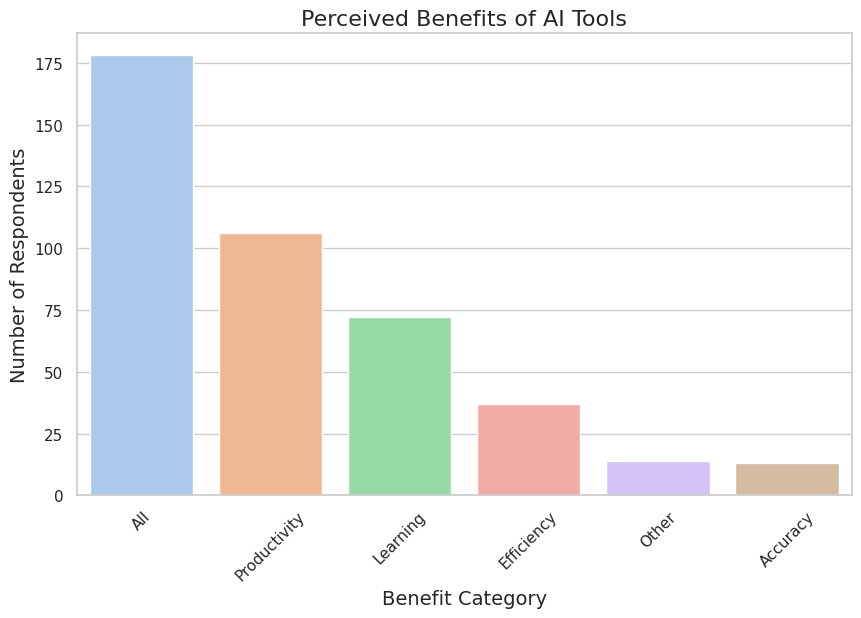

In [ ]:
cleaned_ai_acc_data = Data['AIAcc'].dropna()
mapping_dict = {
    'Increase productivity;Greater efficiency;Speed up learning;Improve accuracy in coding': 'All',
    'Greater efficiency': 'Efficiency',
    'Improve accuracy in coding': 'Accuracy',
    'Increase productivity': 'Productivity',
    'Speed up learning': 'Learning',
    'Other (please explain)': 'Other'
}
cleaned_ai_acc_data = cleaned_ai_acc_data.map(mapping_dict)
mapped_benefit_counts = cleaned_ai_acc_data.value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=mapped_benefit_counts.index, y=mapped_benefit_counts.values, palette='pastel')
plt.title('Perceived Benefits of AI Tools', fontsize=16)
plt.xlabel('Benefit Category', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.show()